In [1]:
import sys
print(sys.version)

3.7.16 (default, Jan 17 2023, 16:06:28) [MSC v.1916 64 bit (AMD64)]


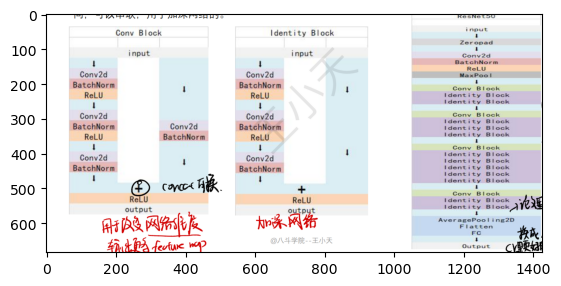

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

image = imread('resnet50.png')
plt.imshow(image)
plt.show()

In [3]:
'''
#from __future__ import print_fuction
#python兼容性，确保Python2/3中都能使用print()函数
import numpy as np
from keras import layers #layers模块，用于构建网络的层

from keras.layers import Input #用于定义网络的输出成
from keras.layers import Dense, Conv2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.layers import Activation, BatchNormalization, Flatten
from keras.models import Model #导入keras的Model类，用于定义和构建神经网络模型

from keras.preprocessing import image #用来进行图像处理
from keras.utils.data_utils import get_file #用于从指定url下载文件并保存在本地
# from keras.applications.imagenet_utils import decode_prediction #用于将模型预测分类结果（类别索引）解码为可读标签
from keras.applications.imagenet_utils import preprocess_input #用于预处理输入数据（通常是图像）以符合与训练模型的输入格式和要求

import keras.backend as K
#导入keras的后端模块，用来处理和TensorFlow，Theano, CNTK之间的兼容性
'''

'\n#from __future__ import print_fuction\n#python兼容性，确保Python2/3中都能使用print()函数\nimport numpy as np\nfrom keras import layers #layers模块，用于构建网络的层\n\nfrom keras.layers import Input #用于定义网络的输出成\nfrom keras.layers import Dense, Conv2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D\nfrom keras.layers import Activation, BatchNormalization, Flatten\nfrom keras.models import Model #导入keras的Model类，用于定义和构建神经网络模型\n\nfrom keras.preprocessing import image #用来进行图像处理\nfrom keras.utils.data_utils import get_file #用于从指定url下载文件并保存在本地\n# from keras.applications.imagenet_utils import decode_prediction #用于将模型预测分类结果（类别索引）解码为可读标签\nfrom keras.applications.imagenet_utils import preprocess_input #用于预处理输入数据（通常是图像）以符合与训练模型的输入格式和要求\n\nimport keras.backend as K\n#导入keras的后端模块，用来处理和TensorFlow，Theano, CNTK之间的兼容性\n'

In [4]:
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D,ZeroPadding2D, AveragePooling2D, Activation, BatchNormalization, Flatten, add
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import tensorflow.keras.backend as K
from tensorflow.keras.utils import get_file
from tensorflow.keras.applications.imagenet_utils import decode_predictions, preprocess_input


In [5]:
def identity_block (input_tensor, kernel_size, filters, stage, block):
    
    filters1, filters2, filters3 = filters
    
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    x = Conv2D(filters1, (1,1), name = conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(name = bn_name_base + '2a')(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters2, kernel_size, padding = 'same', name = conv_name_base + '2b')(x)
    x = BatchNormalization(name = bn_name_base + '2b')(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters3,(1,1), name = conv_name_base + '2c')(x)
    x = BatchNormalization(name = bn_name_base + '2c')(x)
    
    x = layers.add([x, input_tensor])
    x = Activation('relu')(x)
    
    return x


In [6]:
def conv_block(input_tensor, kernel_size, filters, stage, block, strides = (2,2)):
    
    filters1, filters2, filters3 = filters
    
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    x = Conv2D(filters1, (1,1), strides = strides, name = conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(name = bn_name_base + '2a')(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters2, kernel_size, padding = 'same', name = conv_name_base + '2b')(x)
    x = BatchNormalization(name = bn_name_base + '2b')(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters3,(1,1), name = conv_name_base + '2c')(x)
    x = BatchNormalization(name = bn_name_base + '2c')(x)
    
    shortcut = Conv2D(filters3,(1,1),strides = strides, name = conv_name_base + '1')(input_tensor)
    shortcut = BatchNormalization(name = bn_name_base + '1')(shortcut)
    
    x = layers.add([x, shortcut])
    x = Activation('relu')(x)
    
    return x    

In [7]:
def Resnet50(input_shape = [224,224,3], class_number = 1000):
    
    img_input = Input(shape = input_shape)
    x = ZeroPadding2D((3,3))(img_input)
    
    x = Conv2D(64,(7,7), strides = (2,2), name = 'conv1')(x)
    x = BatchNormalization(name = 'bn_conv1')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3,3), strides = (2,2))(x)
    
    x = conv_block(x, 3, [64,64,256], stage = 2, block = 'a', strides = (1,1))
    x = identity_block(x,3,[64,64,256], stage = 2, block = 'b')
    x = identity_block(x,3,[64,64,256], stage = 2, block = 'c')
    
    x = conv_block(x, 3, [128,128,512], stage = 3, block = 'a')
    x = identity_block(x,3,[128,128,512], stage = 3, block = 'b')
    x = identity_block(x,3,[128,128,512], stage = 3, block = 'c')   
    x = identity_block(x,3,[128,128,512], stage = 3, block = 'd')   
    
    x = conv_block(x, 3, [256,256,1024], stage = 4, block = 'a')
    x = identity_block(x,3,[256,256,1024], stage = 4, block = 'b')
    x = identity_block(x,3,[256,256,1024], stage = 4, block = 'c')   
    x = identity_block(x,3,[256,256,1024], stage = 4, block = 'd') 
    x = identity_block(x,3,[256,256,1024], stage = 4, block = 'e')   
    x = identity_block(x,3,[256,256,1024], stage = 4, block = 'f') 
    
    x = conv_block(x, 3, [512,512,2048], stage = 5, block = 'a')
    x = identity_block(x,3,[512,512,2048], stage = 5, block = 'b')
    x = identity_block(x,3,[512,512,2048], stage = 5, block = 'c') 
    
    x = AveragePooling2D((7,7), name = 'avg_pool')(x)
    
    x = Flatten()(x)
    x = Dense(class_number, activation = 'softmax', name = 'fc1000')(x)
    
    model = Model (img_input, x, name = 'resnet50')
    model.load_weights('resnet50_weights_tf_dim_ordering_tf_kernels.h5')
    return model

In [9]:
if __name__ == '__main__':
    model = Resnet50()
    model.summary()
    
    img_path = 'elephant.jpg'
    img = image.load_img(img_path, target_size=(224,224))
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x = preprocess_input(x)
    
    print('Input image shape', x.shape)
    preds = model.predict(x)
    
    print('Predicted', decode_predictions(preds))

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________